# First I Calibrate the camera so that the image will be undistored. 

In [4]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib qt
import matplotlib.image as mpimg

calfolder = './camera_cal/'
images = glob.glob(calfolder+'*.jpg')
img = mpimg.imread(images[0])
plt.imshow(img)
plt.show()


# using checkerboard images, I can find the distortion coefficients and the camera matrix

In [5]:
nx = 9
ny = 6

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((ny*nx,3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

for idx, fname in enumerate(images):
    img = mpimg.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        # Draw and display the corners
        cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
        #write_name = 'corners_found'+str(idx)+'.jpg'
        #cv2.imwrite(write_name, img)
        #cv2.imshow('img', img)
        #cv2.waitKey(500)

#cv2.destroyAllWindows()


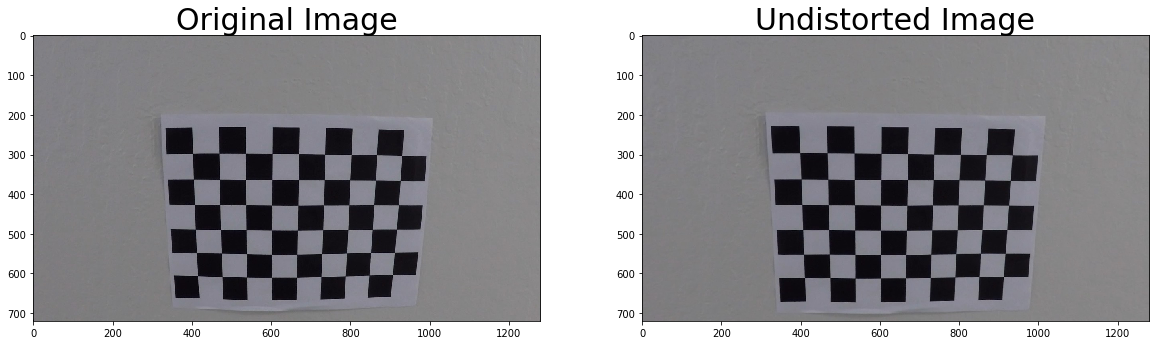

In [6]:
import pickle
%matplotlib inline

# Test undistortion on an iage
img = mpimg.imread(images[5])
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)


dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('./calibration/test_undist.jpg',dst)
# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "./calibration/wide_dist_pickle.p", "wb" ) )
#dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

In [7]:
print (mtx)
print (dist)

[[  1.15396093e+03   0.00000000e+00   6.69705357e+02]
 [  0.00000000e+00   1.14802496e+03   3.85656234e+02]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
[[ -2.41017956e-01  -5.30721173e-02  -1.15810355e-03  -1.28318856e-04
    2.67125290e-02]]


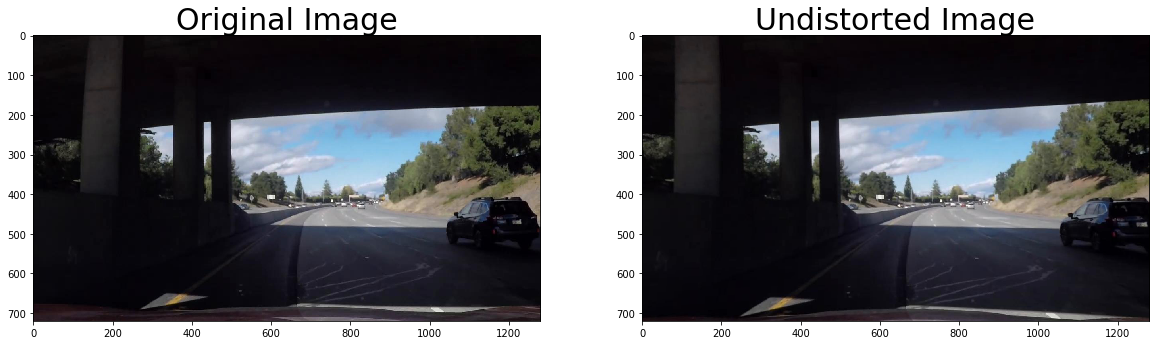

In [8]:
#testimagefile = './test_images/straight_lines1.jpg'
testimagefile = './tak/test11.jpg'


img = mpimg.imread(testimagefile)
dst = cv2.undistort(img, mtx, dist, None, mtx)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

# Now I will apply filters so that only lane will show up

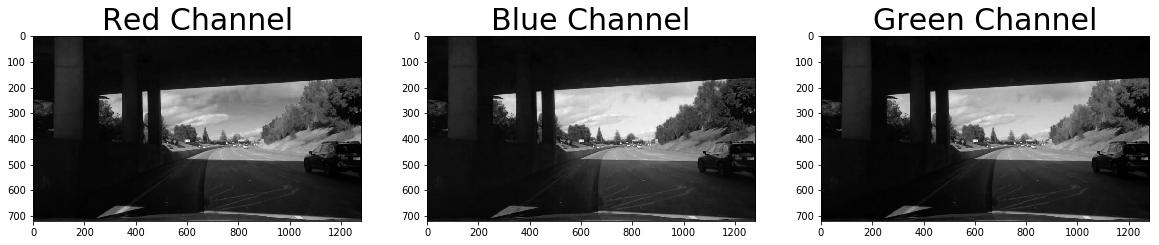

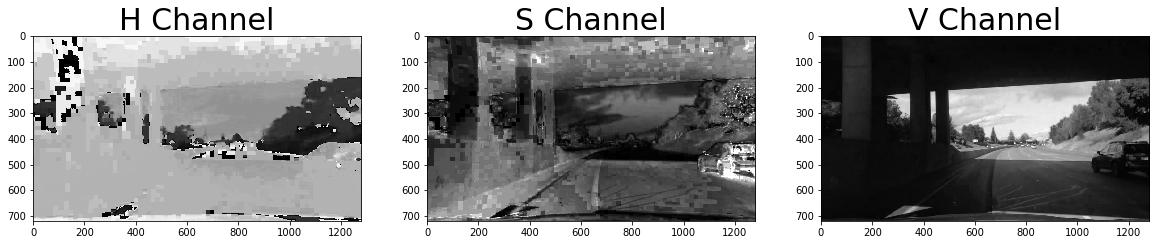

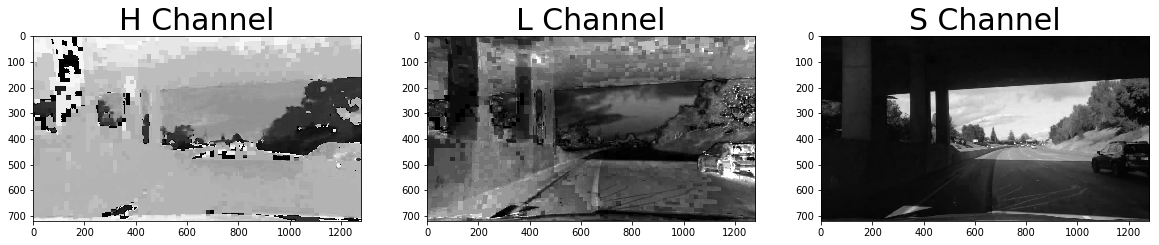

In [9]:
r,g,b = dst[:,:,0],dst[:,:,1],dst[:,:,2]
f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.imshow(r,'gray')
ax1.set_title('Red Channel', fontsize=30)
ax2.imshow(b,'gray')
ax2.set_title('Blue Channel', fontsize=30)
ax3.imshow(g,'gray')
ax3.set_title('Green Channel', fontsize=30)

hsv = cv2.cvtColor(dst, cv2.COLOR_RGB2HSV)

h,s,v = hsv[:,:,0],hsv[:,:,1],hsv[:,:,2]
f, (ax4, ax5,ax6) = plt.subplots(1, 3, figsize=(20,10))
ax4.imshow(h,'gray')
ax4.set_title('H Channel', fontsize=30)
ax5.imshow(s,'gray')
ax5.set_title('S Channel', fontsize=30)
ax6.imshow(v,'gray')
ax6.set_title('V Channel', fontsize=30)

hls = cv2.cvtColor(dst, cv2.COLOR_RGB2HLS)

h1,l1,s1 = hls[:,:,0],hsv[:,:,1],hsv[:,:,2]
f, (ax7, ax8,ax9) = plt.subplots(1, 3, figsize=(20,10))
ax7.imshow(h1,'gray')
ax7.set_title('H Channel', fontsize=30)
ax8.imshow(l1,'gray')
ax8.set_title('L Channel', fontsize=30)
ax9.imshow(s1,'gray')
ax9.set_title('S Channel', fontsize=30)


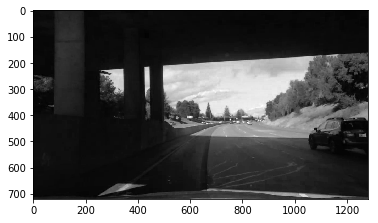

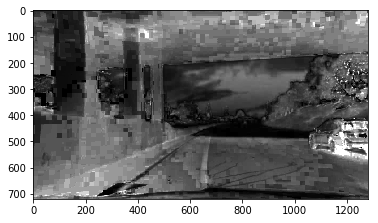

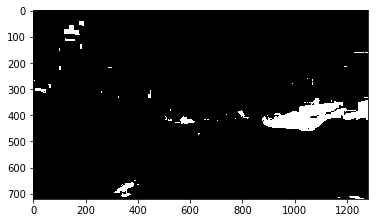

In [10]:
test = np.copy(hsv)
result = np.zeros_like(test[:,:,:])
plt.imshow(test[:,:,2],'gray')
plt.show()
plt.imshow(s,'gray')
plt.show()

if (np.mean(v)>50):
    threshs = (25, 255)
    threshh = (0, 30)
else:
    threshs = (10, 50)
    threshh = (0, 130)
    
binarys = np.zeros_like(s)
binarys[(s> threshs[0]) & (s < threshs[1])] = 1
threshl = (180, 255)

binaryl = np.zeros_like(l1)
binaryl[(l1> threshl[0]) & (l1 < threshl[1])] = 1
binarysl = np.zeros_like(s1)
binarysl[((binarys==1) | (binaryl==1))] = 1


binaryh = np.zeros_like(s1)
binaryh[(h1> threshh[0]) & (h1< threshh[1])] = 1

threshr = (150, 255)
binaryr = np.zeros_like(r)
binaryr[(r> threshr[0]) & (r < threshr[1])] = 1

combine1 = np.zeros_like(binarys)
combine1 = ((binarys==1 )& (binaryh==1))

plt.imshow(combine1,'gray')
plt.show()

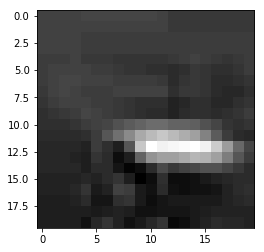

54.7464073351
[[43 43 43 43 44 44 44 44 44 44 44 43 41 41 41 41 41 41 41 41]
 [43 43 43 43 43 43 43 43 43 43 43 43 41 41 41 41 41 41 41 41]
 [43 43 43 43 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42]
 [43 43 43 43 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42]
 [42 42 42 43 41 41 41 40 40 40 40 40 41 42 43 42 41 40 41 42]
 [42 43 43 43 43 42 42 41 40 40 39 39 38 39 41 40 39 39 40 42]
 [42 43 44 44 43 43 43 42 42 42 42 41 38 40 41 40 38 38 39 40]
 [41 43 44 43 42 42 42 43 43 43 43 43 39 41 41 40 38 37 37 39]
 [40 42 43 43 43 42 42 41 40 39 39 39 36 37 39 39 37 37 39 40]
 [39 40 41 42 44 43 42 41 40 39 38 38 36 38 39 39 38 39 40 42]
 [39 39 39 40 42 43 44 47 49 51 53 53 51 51 50 47 44 40 39 40]
 [38 38 38 38 39 42 48 54 60 67 71 74 71 68 65 58 49 42 38 37]
 [37 37 37 37 36 42 39 35 48 74 87 84 85 86 87 84 75 64 52 44]
 [37 37 37 36 35 40 38 31 35 51 62 65 65 67 70 69 65 57 48 42]
 [37 37 37 37 35 38 38 33 29 31 38 45 41 43 45 47 47 44 41 38]
 [36 36 36 36 37 36 38 40 35 28 31 39 31 

In [11]:
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    # Calculate directional gradient
    # Apply threshold
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    
    if (orient == 'x'):
        sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
        abs_sobelx = np.absolute(sobelx)
        scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    else:
        sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
        abs_sobely = np.absolute(sobely)
        scaled_sobel = np.uint8(255*abs_sobely/np.max(abs_sobely))
    
    thresh_min , thresh_max = thresh
    grad_binary = np.zeros_like(scaled_sobel)
    grad_binary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

    return grad_binary
    

def mag_thresh(image, sobel_kernel=3, mag_thresh=(0, 100)):
    # Calculate gradient magnitude
    # Apply threshold
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    abs_sobelxy = np.sqrt(sobelx**2+sobely**2)
    scaled_sobel = np.uint8(255*abs_sobelxy/np.max(abs_sobelxy))
    sxybinary = np.zeros_like(scaled_sobel)
    thresh_min, thresh_max = mag_thresh
    sxybinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    return sxybinary

    

def dir_threshold(image, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Calculate gradient direction
    # Apply threshold
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize = sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize = sobel_kernel)
    abs_sobelx = np.abs(sobelx)
    abs_sobely = np.abs(sobely)
    direction = np.arctan2(abs_sobely,abs_sobelx)
    dirbinary = np.zeros_like(direction)
    thresh_min, thresh_max = thresh
    dirbinary[(direction >= thresh_min) & (direction <= thresh_max)] = 1
    return dirbinary

gray = cv2.cvtColor(dst,cv2.COLOR_RGB2GRAY)
threshw = (170,255)
binaryw = np.zeros_like(gray)
binaryw[(gray> threshw[0]) & (gray < threshw[1])] = 1

ksize = 3 #
gradx = abs_sobel_thresh(dst, orient='x', sobel_kernel=ksize, thresh=(20, 255))
grady = abs_sobel_thresh(dst, orient='y', sobel_kernel=ksize, thresh=(30, 255))

mag_binary = mag_thresh(dst, sobel_kernel=ksize, mag_thresh=(0,255))
dir_binary = dir_threshold(dst, sobel_kernel=ksize, thresh=(-np.pi/2,np.pi/2))
    
combined = np.zeros_like(dir_binary)
combined[((combine1==1) |(binaryw==1))] = 1
combined2 = np.zeros_like(dir_binary)
combined2[((gradx==1)&(grady==0)|(combined==1))] = 1
patch = gray[550:570,830:850]
vpatch = v[550:570,830:850]
plt.imshow(patch,'gray')
plt.show()
print (np.mean(v))
print (patch)

In [41]:
# now that i am satisfied with the filter performance, I will group the filter into a function for easy use
def imagefiter(image):
    gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    h,s,v = hsv[:,:,0],hsv[:,:,1],hsv[:,:,2]
    hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    h1,l1,s1 = hls[:,:,0],hls[:,:,1],hls[:,:,2]
    
    if (np.mean(v)>60):
        threshs = (25, 255)
        threshh = (0, 30)
        threshw = (60+np.mean(v), 255)
    else:
        threshs = (10, 50)
        threshh = (0, 130)
        threshw = (50, 90)
        
    binarys = np.zeros_like(s1)
    binarys[(s> threshs[0]) & (s < threshs[1])] = 1
    threshl = (150, 255)
    binaryl = np.zeros_like(l1)
    binaryl[(l1> threshl[0]) & (l1 < threshl[1])] = 1
    binarysl = np.zeros_like(s1)
    binarysl[((binarys==1) | (binaryl==1))] = 1
    binaryh = np.zeros_like(s1)
    binaryh[(h1> threshh[0]) & (h1< threshh[1])] = 1

    threshr = (150, 255)
    binaryr = np.zeros_like(r)
    binaryr[(r> threshr[0]) & (r < threshr[1])] = 1

    combine1 = np.zeros_like(binarys)
    combine1 = ((binarys==1 )& (binaryh==1))
    
    binaryw = np.zeros_like(gray)
    binaryw[(gray> threshw[0]) & (gray < threshw[1])] = 1
    ksize = 3 #
    gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(60, 255))
    grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(20, 255))
    mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=(90,255))
    dir_binary = dir_threshold(image, sobel_kernel=ksize, thresh=(0, np.pi/16))
    combined = np.zeros_like(dir_binary)
    combined[((combine1==1) |((binaryw==1)))] = 1
    combined[650:,:] = 0

    return combined

# now I will define Region of Interest ROI 
import math

globvarnegangle = 0 
globvarposangle = 0
globvarpostop = [0,0]
globvarposbot = [0,0]
globvarnegtop = [0,0]
globvarnegbot = [0,0]
globvarnegline = [0,0,0,0]#x1,y1,x2,y2 
globvarposline = [0,0,0,0]#x1,y1,x2,y2


def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    # return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    """
    Applies an image mask.
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255     
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + λ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, α, img, β, λ)
def draw_lines(img, lines, color=[255, 0, 0], thickness=2):
    """
    NOTE: this is the function you might want to use as a starting point once you want to 
    average/extrapolate the line segments you detect to map out the full
    extent of the lane (going from the result shown in raw-lines-example.mp4
    to that shown in P1_example.mp4).  
    
    Think about things like separating line segments by their 
    slope ((y2-y1)/(x2-x1)) to decide which segments are part of the left
    line vs. the right line.  Then, you can average the position of each of 
    the lines and extrapolate to the top and bottom of the lane.
    
    This function draws `lines` with `color` and `thickness`.    
    Lines are drawn on the image inplace (mutates the image).
    If you want to make the lines semi-transparent, think about combining
    this function with the weighted_img() function below
    """
    negbinx = []
    negbiny = []
    posbinx = []
    posbiny = []
    startnegpos =[]
    ymax,xmax, ch = img.shape
    
    for line in lines:
        for x1,y1,x2,y2 in line:
            deltay = y2-y1
            deltax = x2-x1
            if (deltax==0):
                deltax = 0.00000001 #to avold overflow
            length = math.sqrt(deltax**2+deltay**2)
            angle = math.atan(deltay/deltax)*180/math.pi
            if (angle>25):
                negbinx.append(x1)
                negbiny.append(y1)
                negbinx.append(x2)
                negbiny.append(y2)
            elif (angle<-25):
                posbinx.append(x1)
                posbiny.append(y1)
                posbinx.append(x2)
                posbiny.append(y2)
    negm,negb = np.polyfit(negbinx,negbiny,1)
    negy1 = ymax*.65
    negx1= (negy1-negb)/negm  
    negy2 = ymax
    negx2 = (ymax-negb)/negm
    deltay =  negy2-negy1
    deltax = negx2 -negx1
    global globvarnegangle 
    globvarnegangle= math.atan(deltay/deltax)*180/math.pi
    global globvarnegline
    globvarnegline = [negx1,negy1,negx2,negy2]#x1,y1,x2,y2 

    posm,posb = np.polyfit(posbinx,posbiny,1)
    posy1 = negy1
    posx1= (posy1-posb)/posm  
    posy2 = ymax
    posx2 = (ymax-posb)/posm
    deltay =  posy2-posy1
    deltax = posx2 -posx1
    global globvarposangle 
    globvarposangle= math.atan(deltay/deltax)*180/math.pi
    global globvarposline
    globvarposline = [posx1,posy1,posx2,posy2]#x1,y1,x2,y2

    global globvarpostop 
    globvarpostop= [posx1-50,posy1]
    global globvarposbot
    globvarposbot = [posx2-50,posy2]
    global globvarnegtop
    globvarnegtop = [negx1+50,negy1]
    global globvarnegbot
    globvarnegbot = [negx2+50,negy2]


    cv2.line(img, (int(negx1), int(negy1)), (int(negx2), int(negy2)), color, thickness)
    cv2.line(img, (int(posx1), int(posy1)), (int(posx2), int(posy2)), color, thickness)



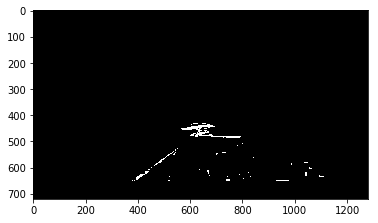

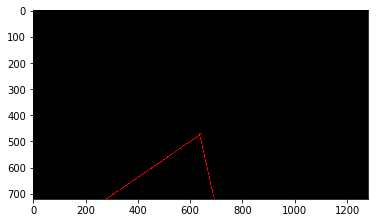

In [23]:
result = imagefiter(dst)

ymax,xmax= result.shape
rb = [xmax,ymax-50] 
lt = [xmax*.48,ymax*.6]
lb = [0,ymax-50]
rt = [xmax*.52,ymax*.6]


pts = np.array([lb,lt,rt,rb], np.int32)
pts = pts.reshape((-1,1,2))

roi = region_of_interest(result*255,[pts])

uroi = np.uint8(roi)
plt.imshow(uroi,'gray')
plt.show()

#Now I will get hough_lines
rho = 1
theta = np.pi/180
threshold = 20
min_line_len = 5
max_line_gap = 5

himg = hough_lines(uroi, rho, theta, threshold, min_line_len, max_line_gap)
plt.figure()
plt.imshow(himg)

In [125]:
print (globvarnegline)
print (globvarposline)

[697.38203044135503, 468.0, 1079.8205813928012, 720]
[580.13172276410205, 468.0, 206.2532584860177, 720]


In [126]:
#now we can use these 4 points to do presetive transpose
midxleft = (globvarposline[0]+globvarposline[2])//2
midxright = (globvarnegline[0]+globvarnegline[2])//2

srcpts = np.float32([[globvarnegline[0],globvarnegline[1]],
                 [globvarnegline[2],globvarnegline[3]],
                 [globvarposline[0],globvarposline[1]],
                 [globvarposline[2],globvarposline[3]]])

dstpts = np.float32([[midxright,0],
                 [midxright,720],
                 [midxleft,0],
                 [midxleft,720]])

print (srcpts)
print (dstpts)
M = cv2.getPerspectiveTransform(srcpts, dstpts)
Minv = cv2.getPerspectiveTransform(dstpts, srcpts)

perstransparameter_pickle = {}
perstransparameter_pickle["srcpts"] = srcpts
perstransparameter_pickle["dstpts"] = dstpts
pickle.dump(perstransparameter_pickle, open( "./calibration/perstransparameterpickle.p", "wb" ) )



[[  697.38201904   468.        ]
 [ 1079.82055664   720.        ]
 [  580.13171387   468.        ]
 [  206.25326538   720.        ]]
[[ 888.    0.]
 [ 888.  720.]
 [ 393.    0.]
 [ 393.  720.]]


In [13]:
print (dst.shape)
pts = np.array([[207,720],[625,432],[656,432],[1103,720]], np.int32)
pts = pts.reshape((-1,1,2))

cv2.polylines(dst,[pts],True,(0,255,255))

img_size = (dst.shape[1],dst.shape[0])

warped = cv2.warpPerspective(dst, M, img_size, flags=cv2.INTER_LINEAR)
plt.imshow(dst)
plt.show()
plt.imshow(warped)
plt.show()

(720, 1280, 3)


NameError: name 'M' is not defined

In [14]:
#now that i am satisfy with the Perspective transform, i will write that into a function for easy use
def persepctivetransform(image,reverse = False):
    img_size = (image.shape[1],image.shape[0])
    perstransparameters = pickle.load(open( "./calibration/perstransparameterpickle.p", "rb" ))
    srcpts = perstransparameters['srcpts']
    dstpts = perstransparameters['dstpts']
    M = cv2.getPerspectiveTransform(srcpts, dstpts)
    Minv = cv2.getPerspectiveTransform(dstpts, srcpts)
    if (reverse==False):
        warped = cv2.warpPerspective(image, M, img_size, flags=cv2.INTER_LINEAR)
    else:
        warped = cv2.warpPerspective(image, Minv, img_size, flags=cv2.INTER_LINEAR)
    return warped

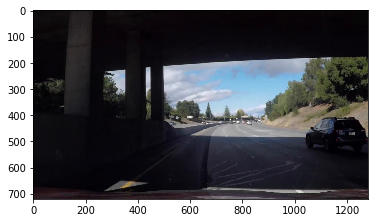

In [15]:
testimagefile = './tak/test11.jpg'
img = mpimg.imread(testimagefile)
dst = cv2.undistort(img, mtx, dist, None, mtx)
plt.imshow(img)

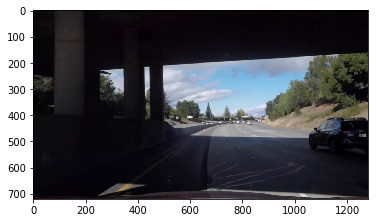

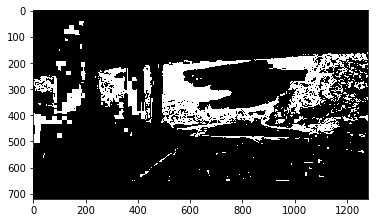

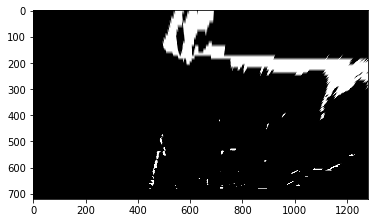

In [16]:
image = dst
filteredimg = imagefiter(image)
plt.imshow(image,'gray')
plt.show()

#region_of_interest(filteredimg,srcpts)
mask = np.zeros_like(filteredimg)   

#defining a 3 channel or 1 channel color to fill the mask with depending on the input image
if len(filteredimg.shape) > 2:
    channel_count = filteredimg.shape[2]  # i.e. 3 or 4 depending on your image
    ignore_mask_color = (255,) * channel_count
else:
    ignore_mask_color = 255

ymax,xmax = image.shape[0],image.shape[1]

rb = [xmax,ymax-50] 
lt = [xmax*.5,ymax*.55]
lb = [0,ymax-50]
rt = [xmax*.5,ymax*.55]

pts = np.array([lb,lt,rt,rb], np.int32)
pts = pts.reshape((-1,1,2))
roi = region_of_interest(filteredimg,[pts])

plt.imshow(filteredimg,'gray')
plt.show()
warped = persepctivetransform(filteredimg)

plt.imshow(warped,'gray')
plt.show()

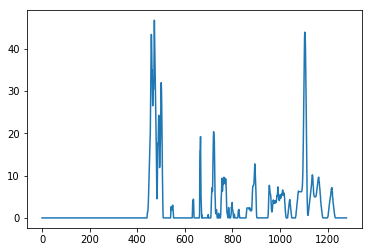

In [17]:
histogram = np.sum(warped[warped.shape[0]//2:,:], axis=0)
plt.plot(histogram)

In [18]:
binary_warped = warped
# Assuming you have created a warped binary image called "binary_warped"
# Take a histogram of the bottom half of the image
histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
# Create an output image to draw on and  visualize the result
out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
# Find the peak of the left and right halves of the histogram
# These will be the starting point for the left and right lines
midpoint = np.int(histogram.shape[0]/2)
leftx_base = np.argmax(histogram[:midpoint])
rightx_base = np.argmax(histogram[midpoint:]) + midpoint

# Choose the number of sliding windows
nwindows = 9
# Set height of windows
window_height = np.int(binary_warped.shape[0]/nwindows)
# Identify the x and y positions of all nonzero pixels in the image
nonzero = binary_warped.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
# Current positions to be updated for each window
leftx_current = leftx_base
rightx_current = rightx_base
# Set the width of the windows +/- margin
margin = 100
# Set minimum number of pixels found to recenter window
minpix = 50
# Create empty lists to receive left and right lane pixel indices
left_lane_inds = []
right_lane_inds = []

# Step through the windows one by one
for window in range(nwindows):
    # Identify window boundaries in x and y (and right and left)
    win_y_low = binary_warped.shape[0] - (window+1)*window_height
    win_y_high = binary_warped.shape[0] - window*window_height
    win_xleft_low = leftx_current - margin
    win_xleft_high = leftx_current + margin
    win_xright_low = rightx_current - margin
    win_xright_high = rightx_current + margin
    # Draw the windows on the visualization image
    cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),
    (0,255,0), 2) 
    cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),
    (0,255,0), 2) 
    # Identify the nonzero pixels in x and y within the window
    good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
    (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
    good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
    (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
    # Append these indices to the lists


    left_lane_inds.append(good_left_inds)
    right_lane_inds.append(good_right_inds)

    
    # If you found > minpix pixels, recenter next window on their mean position
    if len(good_left_inds) > minpix:
        leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
    if len(good_right_inds) > minpix:        
        rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

# Concatenate the arrays of indices
left_lane_inds = np.concatenate(left_lane_inds)
right_lane_inds = np.concatenate(right_lane_inds)

# Extract left and right line pixel positions
if (len(left_lane_inds)>1000&len(right_lane_inds)>1000):
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 
elif (len(left_lane_inds)>len(right_lane_inds)):
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[left_lane_inds]+420
    righty = nonzeroy[left_lane_inds] 
elif (len(left_lane_inds)<len(right_lane_inds)):
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 
    leftx = nonzerox[right_lane_inds]-420
    lefty = nonzeroy[right_lane_inds] 


# Fit a second order polynomial to each
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)


(720, 0)

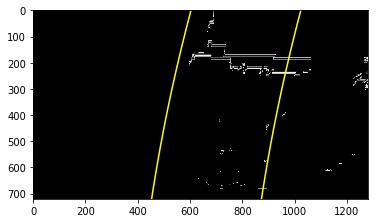

In [19]:
# Generate x and y values for plotting
ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

In [20]:
# Define y-value where we want radius of curvature
# I'll choose the maximum y-value, corresponding to the bottom of the image
y_eval = np.max(ploty)
left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
print(left_curverad, right_curverad)

6606.71668799 6606.71668802


In [21]:
# Define conversions in x and y from pixels space to meters
ym_per_pix = 30/720 # meters per pixel in y dimension
xm_per_pix = 3.7/700 # meters per pixel in x dimension
# Fit new polynomials to x,y in world space
left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
# Calculate the new radii of curvature
left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
# Now our radius of curvature is in meters
print(left_curverad, 'm', right_curverad, 'm')
# Example values: 632.1 m    626.2 m

2097.7699443 m 2097.7699443 m


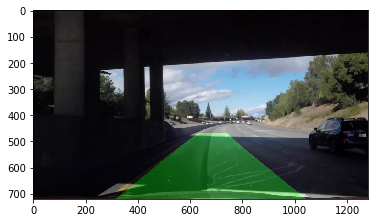

In [22]:
# Create an image to draw the lines on
warp_zero = np.zeros_like(warped).astype(np.uint8)
color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
perstransparameters = pickle.load(open( "./calibration/perstransparameterpickle.p", "rb" ))
srcpts = perstransparameters['srcpts']
dstpts = perstransparameters['dstpts']
M = cv2.getPerspectiveTransform(srcpts, dstpts)
Minv = cv2.getPerspectiveTransform(dstpts, srcpts)
# Recast the x and y points into usable format for cv2.fillPoly()
pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
pts = np.hstack((pts_left, pts_right))

# Draw the lane onto the warped blank image
cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

# Warp the blank back to original image space using inverse perspective matrix (Minv)
newwarp = cv2.warpPerspective(color_warp, Minv, (image.shape[1], image.shape[0])) 
# Combine the result with the original image
result = cv2.addWeighted(dst, 1, newwarp, 0.3, 0)
plt.imshow(result)

In [23]:
# Define a class to receive the characteristics of each line detection
class Line():
    def __init__(self):
        self.leftfit = None
        self.rightfit = None
        self.lanewidth = None

In [24]:
def generatelanecolor(image, warped, left_fit,right_fit):
    perstransparameters = pickle.load(open( "./calibration/perstransparameterpickle.p", "rb" ))
    srcpts = perstransparameters['srcpts']
    dstpts = perstransparameters['dstpts']
    M = cv2.getPerspectiveTransform(srcpts, dstpts)
    Minv = cv2.getPerspectiveTransform(dstpts, srcpts)
    ploty = np.linspace(0, warped.shape[0]-1, warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    warp_zero = np.zeros_like(warped).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))
    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))
    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (image.shape[1], image.shape[0])) 
    # Combine the result with the original image
    result = cv2.addWeighted(image, 1, newwarp, 0.3, 0)
    return result

In [25]:
def Computecurvatureradius(lefty,leftx,righty,rightx):
    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    # Fit new polynomials to x,y in world space
    left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
    # Calculate the new radii of curvature
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    # Now our radius of curvature is in meters
    return left_curverad,right_curverad

In [26]:
def ComputeLRpolyline(binary_warped):

    # Assuming you have created a warped binary image called "binary_warped"
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and  visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]/2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # Choose the number of sliding windows
    nwindows = 9
    # Set height of windows
    window_height = np.int(binary_warped.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []
    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),
        (0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),
        (0,255,0), 2) 
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))
    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)
    # Extract left and right line pixel positions
    leftx = []
    lefty = [] 
    rightx = []
    righty = []
    if (left_lane_inds.shape[0]>1000 and right_lane_inds.shape[0]>1000):
        leftx = nonzerox[left_lane_inds]
        lefty = nonzeroy[left_lane_inds] 
        rightx = nonzerox[right_lane_inds]
        righty = nonzeroy[right_lane_inds]
    elif (left_lane_inds.shape[0]<right_lane_inds.shape[0]):
        rightx = nonzerox[right_lane_inds]
        righty = nonzeroy[right_lane_inds]
        lefty = righty
        leftx = np.maximum(rightx  - 420,0)
    elif (left_lane_inds.shape[0]>right_lane_inds.shape[0]):
        leftx = nonzerox[left_lane_inds]
        lefty = nonzeroy[left_lane_inds] 
        righty = lefty 
        rightx = leftx+ 420
    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    return leftx,lefty,rightx,righty, left_fit,right_fit




In [44]:
#Process video
projectline = Line()
def process_image(image):
    #first undistort image
    dst = cv2.undistort(image, mtx, dist, None, mtx)
    #apply filter to image   
    result = np.zeros((image.shape[0],image.shape[1]))
    for i in range(0,image.shape[0],30):
        result[i:i+30,:] = imagefiter(image[i:i+30,:,:])
    filteredimg = result
    filteredimg[650:,:]=0

    #apply perspective transpose
    warped = persepctivetransform(filteredimg)
    if (not(projectline.leftfit == None)):
        warped = masknoise(warped,projectline.leftfit,projectline.rightfit,50)
    #compute for left and right poly line
    try:
        leftx,lefty,rightx,righty,left_fit, right_fit = ComputeLRpolyline(warped)
    except TypeError:
        warped = persepctivetransform(filteredimg)
        leftx,lefty,rightx,righty,left_fit, right_fit = ComputeLRpolyline(warped)
    projectline.leftfit = left_fit
    projectline.rightfit = right_fit
    projectline.lanewidth = right_fit[2]- left_fit[2]
    #compute curvatureradius for left and right line
    Computecurvatureradius(leftx,lefty,rightx,righty)
    #generate lane color
    result = generatelanecolor(image,warped,left_fit,right_fit)
    return result


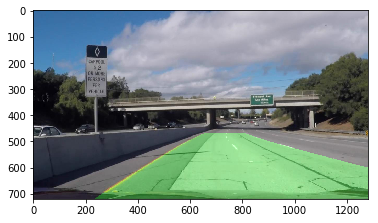

In [36]:
projectline = Line()
testimagefile = './tak/test9.jpg'
img = mpimg.imread(testimagefile)
result = process_image(img)
plt.imshow(result)

In [37]:
def liney(linefit,x):
    return np.int32((linefit[0]*x*x+linefit[1]*x+linefit[2]))

def masknoise(image,leftfit,rightfit,offset):
    rb1 = [liney(leftfit,ymax)+offset,ymax] 
    lt1 = [liney(leftfit,0)-offset,0] 
    lb1 = [liney(leftfit,ymax)-offset,ymax] 
    rt1 = [liney(leftfit,0)+offset,0] 
    rb2 = [liney(rightfit,ymax)+offset,ymax] 
    lt2 = [liney(rightfit,0)-offset,0] 
    lb2 = [liney(rightfit,ymax)-offset,ymax] 
    rt2 = [liney(rightfit,0)+offset,0] 
    pts1 = np.array([[lb1,lt1,rt1,rb1],[lb2,lt2,rt2,rb2]], np.int32)
    result = region_of_interest(image,pts1)
    return result


In [45]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML
projectline = Line()
white_output = './challenge_videoresult.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("./challenge_video.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video ./challenge_videoresult.mp4
[MoviePy] Writing video ./challenge_videoresult.mp4



 32%|███▏      | 155/485 [00:59<02:35,  2.13it/s]


 64%|██████▎   | 309/485 [02:01<01:11,  2.48it/s]


 95%|█████████▌| 463/485 [02:57<00:06,  3.31it/s]


100%|██████████| 485/485 [03:04<00:00,  3.45it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ./challenge_videoresult.mp4 

CPU times: user 5min 32s, sys: 1.43 s, total: 5min 34s
Wall time: 3min 5s


In [46]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
  
</video>
""".format(white_output))